In [1]:
%matplotlib inline

# K-Nearest Neighbors

In [1]:
from time import time
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_train = y_raw[0:3900]
y_test = y_raw[4875:6500]

print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


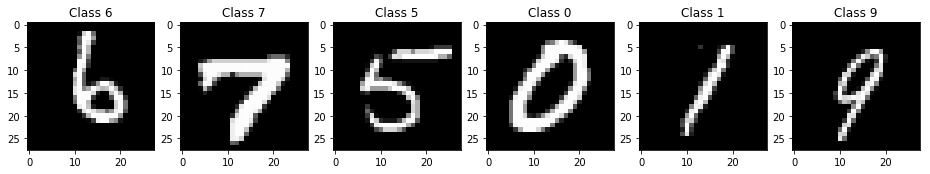

In [3]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

In [4]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


## Training
We will be testing k-ranges between 1 and 10 and adding them to a list to plot later.

In [5]:
error = []
accuracy = []
predictions = []
neighbor_range = 10
t0 = time()
for i in range(1,neighbor_range+1):
    ti = time()
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(X_train.reshape(-1,28*28), y_train)
    pred_i = clf.predict(X_test.reshape(-1,28*28))
    predictions.append(pred_i)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))
    print('Episode: ', i, 'took %.2fs' % (time()-ti))
print('Total time elapsed: %.2fs' % (time()-t0))

Episode:  1 took 6.61s
Episode:  2 took 6.56s
Episode:  3 took 6.58s
Episode:  4 took 6.56s
Episode:  5 took 6.55s
Episode:  6 took 6.59s
Episode:  7 took 6.56s
Episode:  8 took 6.61s
Episode:  9 took 6.81s
Total time elapsed: 59.43s


Plot error and accruacy vs. k-range

Text(0,0.5,'Accuracy')

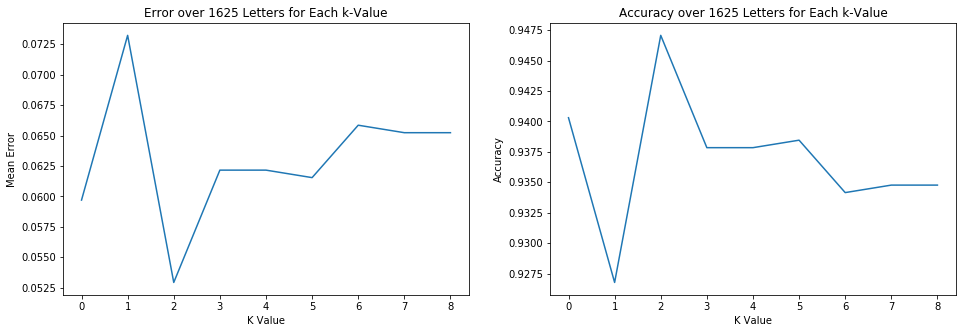

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(error)
plt.title('Error over {} Letters for Each k-Value'.format(len(predictions[0])))  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.title('Accuracy over {} Letters for Each k-Value'.format(len(predictions[0])))  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [10]:
correct_indices = np.nonzero(predictions[2] == y_test)[0]
incorrect_indices = np.nonzero(predictions[2] != y_test)[0]

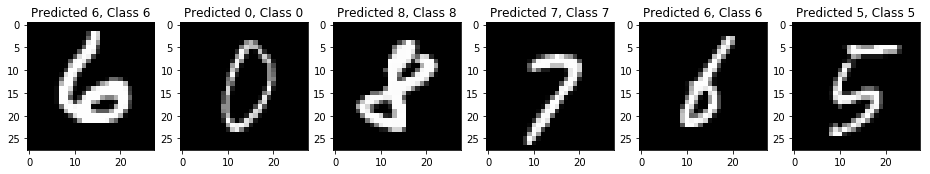

In [13]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[2][correct], y_test[correct]))

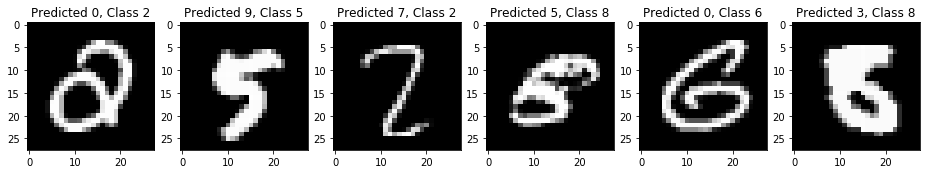

In [14]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[2][incorrect], y_test[incorrect]))